In [1]:
pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image
from PIL import Image

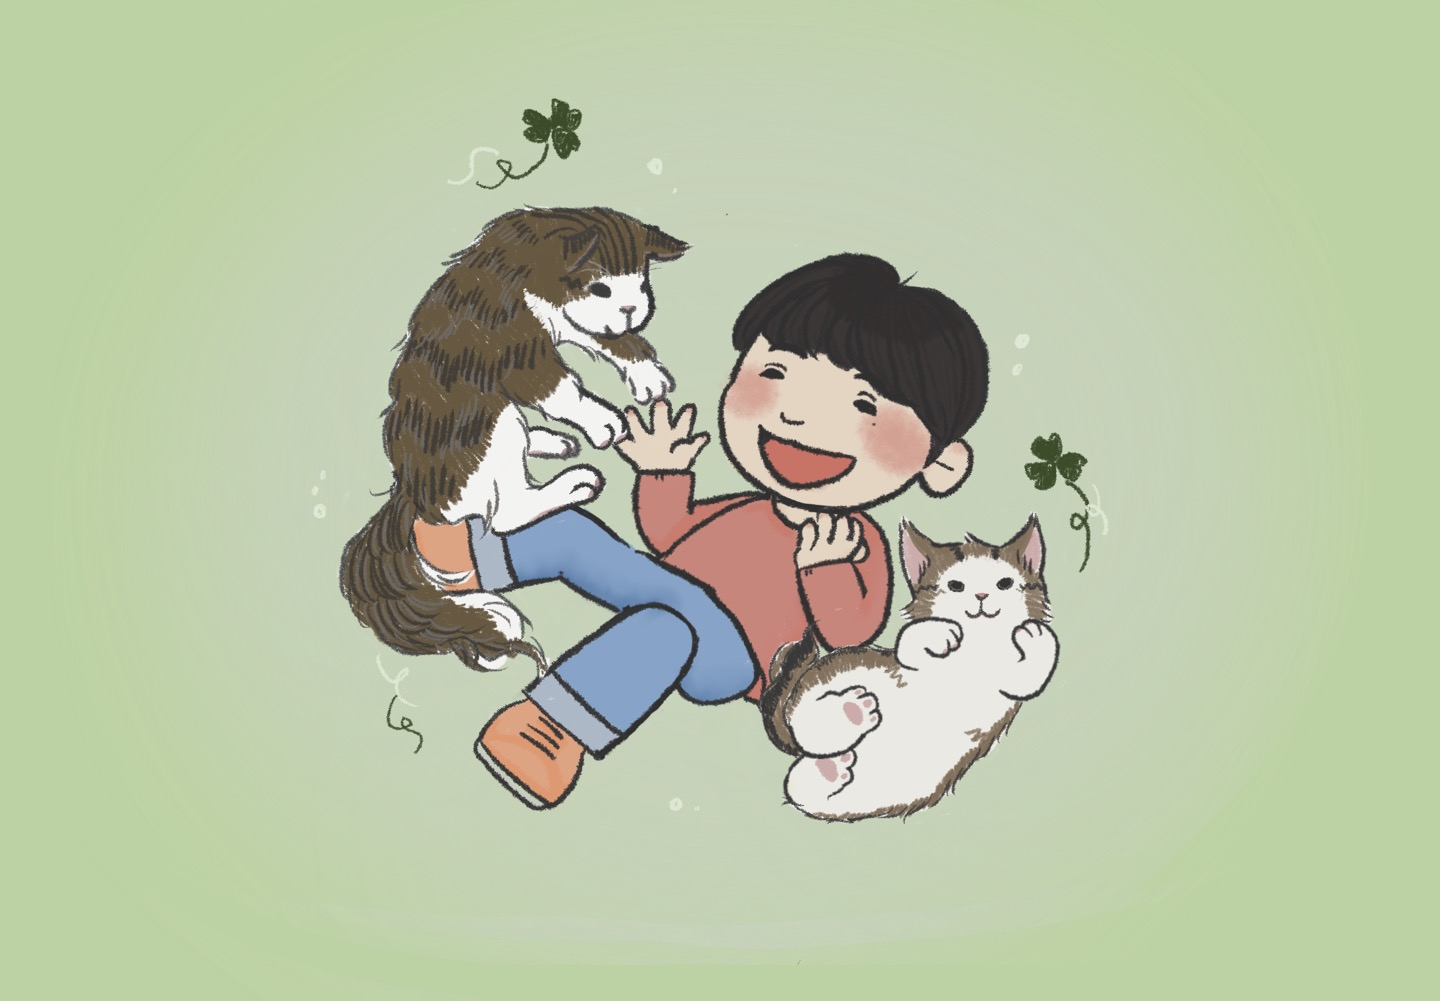

In [13]:
# 이미지 불러오기
image = load_image("/diffuserss/image.jpg")

image

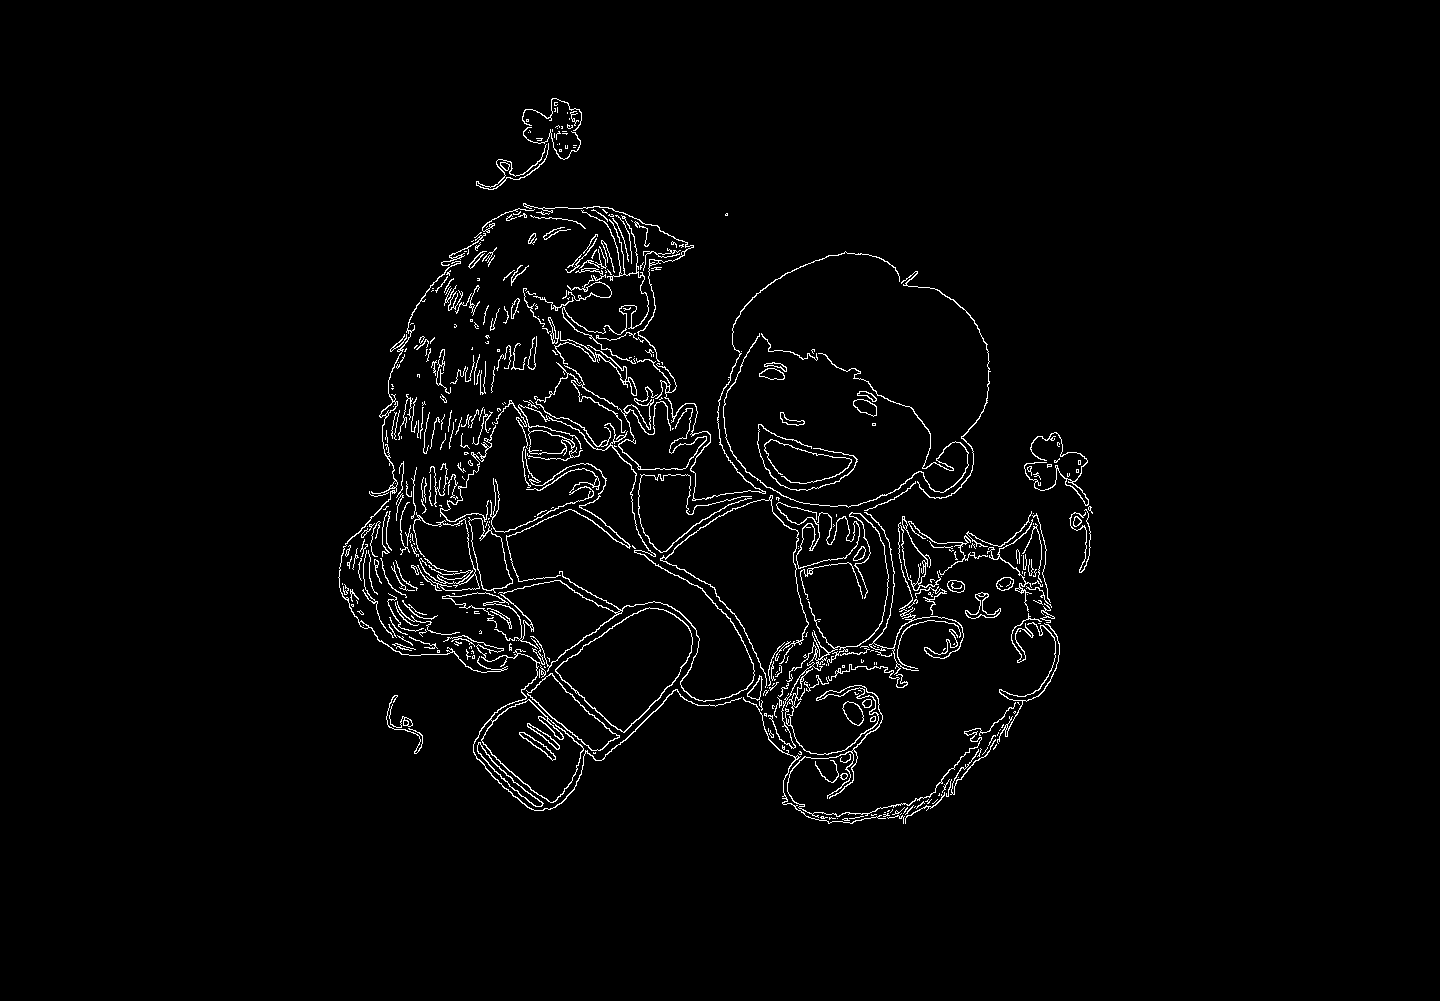

In [14]:
import cv2
from PIL import Image 
import numpy as np

# 이미지를 NumPy 배열로 변환합니다. 
image = np.array(image)

# threshold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다. 
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image

In [15]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [32]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(1)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt="cats, owner, detailed, transform, enhanced clarity, pet portrait, lifelike, character features, expressive, human-animal bond, indoor setting, playful, affectionate, dynamic pose, vivid colors, high contrast, intricate textures, clear background, personalized style", 
    num_inference_steps=100, 
    generator=generator, 
    image=canny_image,
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/diffuserss/canny_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

# 인체 자세 감지

In [31]:
pip install controlnet-aux==0.0.1

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.6 kB ? eta -:--:--
   ---------------------------------------- 44.6/44.6 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.1 MB 9.9 MB/s eta 0:00:05
    --------------------------------------- 0.8/44.1 MB 9.6 MB/s eta 0:00:05
   - -------------------------------------- 1.4/44.1 MB 10.7 MB/s eta 0:00:04
   - -------------------------------------- 2.1/44.1 MB 12.3 MB/s eta 0:00:04
   -- ------------------------------------- 3.1/44.1 MB 14.0 MB/s eta 0:00:03
   --- ------------------------------------ 4.4/44.1 MB 16.3 MB/s eta 0:00:03
   ---- ----------------------------------- 5.4/44.1 MB 18.2 MB/s eta 0:00:03
   ----- ---------------------------------- 5.8/44.1 MB 16.1 MB/s eta 0:00:03
   -----

In [35]:
from controlnet_aux import OpenposeDetector

In [0]:
openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

cuda


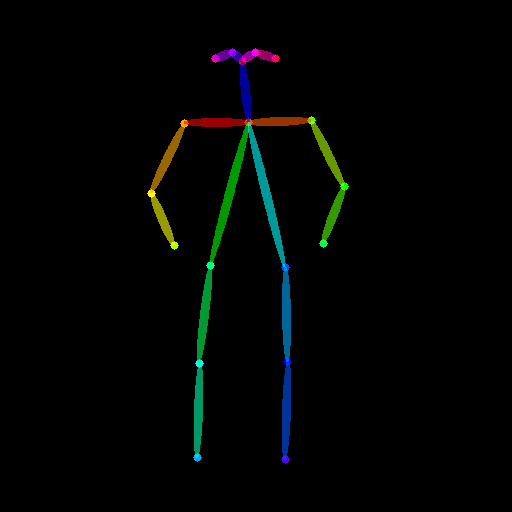

In [92]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

TypeError: 'JpegImageFile' object is not callable

In [40]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel 

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [43]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

In [44]:
# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다. 
generator = torch.manual_seed(1)  

In [46]:

#프롬프트를 작성합니다. 
prompt =  "cats, owner, detailed, transform, enhanced clarity, pet portrait, lifelike, character features, expressive, human-animal bond, indoor setting, playful, affectionate, dynamic pose, vivid colors, high contrast, intricate textures, clear background, personalized style"

In [50]:
# negative_prompt =  # [[YOUR CODE]]

images = openpose_image

  0%|          | 0/100 [00:00<?, ?it/s]

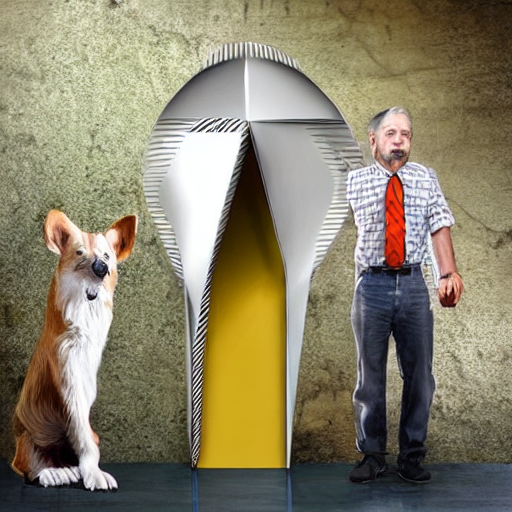

In [52]:

# 이미지를 생성합니다. 


openpose_image1 = canny_pipe(
    prompt=" owner, detailed, transform, enhanced clarity, lifelike, character features, expressive, human-animal bond, indoor setting, playful, affectionate, dynamic pose, intricate textures, clear background, personalized style", 
    num_inference_steps=100, 
    generator=generator, 
    image=openpose_image,
).images[0]
# 생성된 이미지를 출력합니다. 
openpose_image1

# 윤곽선 검출 + 인체 자세 감지

In [105]:
모르겠다

NameError: name '모르겠다' is not defined

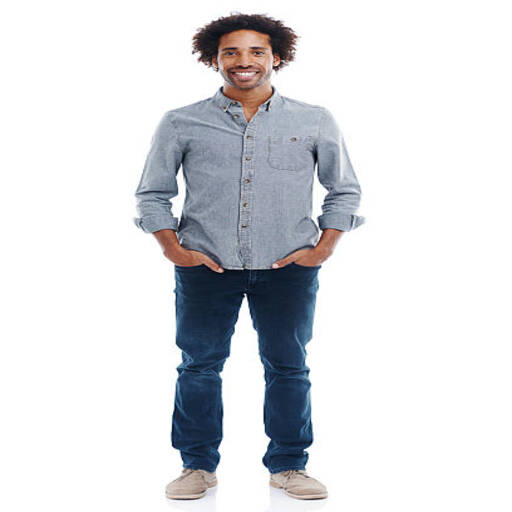

In [106]:
openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image